In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [67]:
sns.set()
data = pd.read_csv("data_time.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,f1,grad,nPop,error,time_minutes,1,2,3,4,5,6
0,200,600,25,10.077318,5.185605,175.978233,814.516064,1465.387366,1526.233419,2175.163102,3262.073042
1,200,600,25,8.252092,10.047284,186.540660,821.186299,1388.666507,1535.062173,2221.488322,3248.640898
2,200,600,25,6.167042,15.067022,202.809365,873.189203,1422.106994,1774.137922,2280.169384,3159.181923
3,200,600,25,4.625701,20.005259,197.322029,808.177612,1423.651419,1775.095686,2337.936276,3123.870584
4,200,600,25,4.815099,21.813252,201.640896,889.442636,1400.371325,1757.356710,2488.415910,3185.938113


In [68]:
data.describe()

,f1,grad,nPop,error,time_minutes,1,2,3,4,5,6
count,80.0,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,200.0,600.0,32.500000,6.944390,14.722520,190.941737,844.805155,1405.975163,1668.112426,2337.667762,3237.637164
std,0.0,0.0,7.547319,2.613121,6.645935,11.622441,36.862094,45.005803,109.846998,93.908751,109.368723
min,200.0,600.0,25.000000,4.195791,5.007568,154.864122,778.624305,1170.098331,1264.646620,2052.474389,3077.534405
25%,200.0,600.0,25.000000,5.235390,10.050163,186.456157,816.779185,1392.900271,1629.293684,2285.408257,3170.389636
50%,200.0,600.0,32.500000,5.884081,15.071935,195.221309,833.034515,1413.377931,1702.206293,2340.748230,3209.380583
75%,200.0,600.0,40.000000,7.359078,20.081007,199.863965,873.858217,1431.057235,1747.656798,2406.453548,3263.728238
max,200.0,600.0,40.000000,15.211570,25.075303,203.051583,931.578353,1473.971985,1799.813721,2496.779407,3639.747934


### Grouping by time

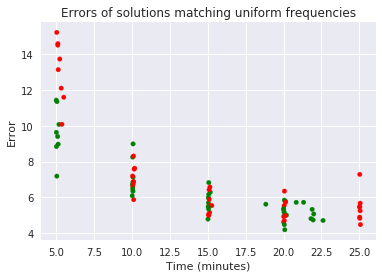

In [69]:
ax = data.plot.scatter(x='time_minutes', y='error', c=['g' if x == 25 else 'r' for x in data['nPop']], sharex=False)
plt.xlabel("Time (minutes)")
plt.ylabel("Error")
plt.title("Errors of solutions matching uniform frequencies")
plt.show()

In [70]:
data['time_5'] = abs(data['time_minutes'] - 5) < 2
data['time_10'] = abs(data['time_minutes'] - 10) < 2
data['time_15'] = abs(data['time_minutes'] - 15) < 2

data.head()

,f1,grad,nPop,error,time_minutes,1,2,3,4,5,6,time_5,time_10,time_15
0,200,600,25,10.077318,5.185605,175.978233,814.516064,1465.387366,1526.233419,2175.163102,3262.073042,True,False,False
1,200,600,25,8.252092,10.047284,186.540660,821.186299,1388.666507,1535.062173,2221.488322,3248.640898,False,True,False
2,200,600,25,6.167042,15.067022,202.809365,873.189203,1422.106994,1774.137922,2280.169384,3159.181923,False,False,True
3,200,600,25,4.625701,20.005259,197.322029,808.177612,1423.651419,1775.095686,2337.936276,3123.870584,False,False,False
4,200,600,25,4.815099,21.813252,201.640896,889.442636,1400.371325,1757.356710,2488.415910,3185.938113,False,False,False


In [71]:
data.drop(['f1', 'grad', 'time_minutes'], axis=1, inplace=True)
data.drop(columns=[x for x in data.columns if type(x)==int], inplace=True)
data.head()

,nPop,error,time_5,time_10,time_15
0,25,10.077318,True,False,False
1,25,8.252092,False,True,False
2,25,6.167042,False,False,True
3,25,4.625701,False,False,False
4,25,4.815099,False,False,False


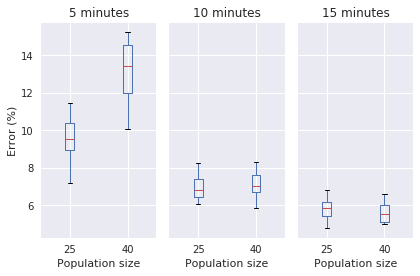

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

data.loc[data['time_5']].boxplot(column='error', by='nPop', ax=axes[0])
axes[0].set_title("5 minutes")
axes[0].set_xlabel("Population size")
axes[0].set_ylabel("Error (%)")

data.loc[data['time_10']].boxplot(column='error', by='nPop', ax=axes[1])
axes[1].set_title("10 minutes")
axes[1].set_xlabel("Population size")

data.loc[data['time_15']].boxplot(column='error', by='nPop', ax=axes[2])
fig.suptitle("")
axes[2].set_title("15 minutes")
axes[2].set_xlabel("Population size")
plt.tight_layout()
plt.show()
